In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Data Fields

 - PetID - Unique hash ID of pet profile 
 - AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
 - Type - Type of animal (1 = Dog, 2 = Cat)
 - Name - Name of pet (Empty if not named)
 - Age - Age of pet when listed, in months
 - Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
 - Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
 - Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
 - Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
 - Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
 - Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
 - MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
 - FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
 - Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
 - Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
 - Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
 - Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
 - Quantity - Number of pets represented in profile
 - Fee - Adoption fee (0 = Free)
 - State - State location in Malaysia (Refer to StateLabels dictionary)
 - RescuerID - Unique hash ID of rescuer
 - VideoAmt - Total uploaded videos for this pet
 - PhotoAmt - Total uploaded photos for this pet
 - Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [2]:
df = pd.read_csv('train/train.csv')
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [49]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor

In [56]:
# Setup column for training (only quantitative ones)
train_columns = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
    'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
    'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt'
]
n = int(np.ceil(len(train_columns) * 0.8))
df1 = df[train_columns]
X = df1[:n]
y = df['AdoptionSpeed'][:n]
X_test = df1[n:]
y_test = df['AdoptionSpeed'][n:]
X.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0


In [57]:
lr_reg = LinearRegression().fit(X, y)
# print(reg.score(X, y))
y_pred = lr_reg.predict(X_test)
mse = np.average((y_pred - y_test)**2)
print(mse)
# print(reg.score(X, y))

72.52662129868857


In [58]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X, y)
y_pred = rf_reg.predict(X_test)
mse = np.average((y_pred - y_test)**2)
print(mse)
# print(clf.score(X_test, y_test))

1.82631430860653


In [59]:
nn_reg = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10))
nn_reg.fit(X, y)
y_pred = clf.predict(X_test)
mse = np.average((y_pred - y_test)**2)
print(mse)
# print(clf.score(X, y))

1.6530680376577418


In [52]:
# check for null 
for col in df.columns:
    print(col, df[col].isna().sum())
# unique values for each column
df_colcount = pd.DataFrame({
    'columns': df.columns,
    'n_unique': [df[col].nunique() for col in df.columns]
})
df_colcount

Type 0
Name 1257
Age 0
Breed1 0
Breed2 0
Gender 0
Color1 0
Color2 0
Color3 0
MaturitySize 0
FurLength 0
Vaccinated 0
Dewormed 0
Sterilized 0
Health 0
Quantity 0
Fee 0
State 0
RescuerID 0
VideoAmt 0
Description 12
PetID 0
PhotoAmt 0
AdoptionSpeed 0


,columns,n_unique
0,Type,2
1,Name,9060
2,Age,106
3,Breed1,176
4,Breed2,135
5,Gender,3
6,Color1,7
7,Color2,7
8,Color3,6
9,MaturitySize,4


# Categorize features

Categorical: PetID, Type, Name, Breed1, Breed2, Gender, Color1, Color2, Color3, Vaccinated, Dewormed, Sterilized, Health, State, RescuerID

text: Description

Quantitative: Age, MaturitySize, FurLength, Quantity, Fee, VideoAmt, PhotoAmt

AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

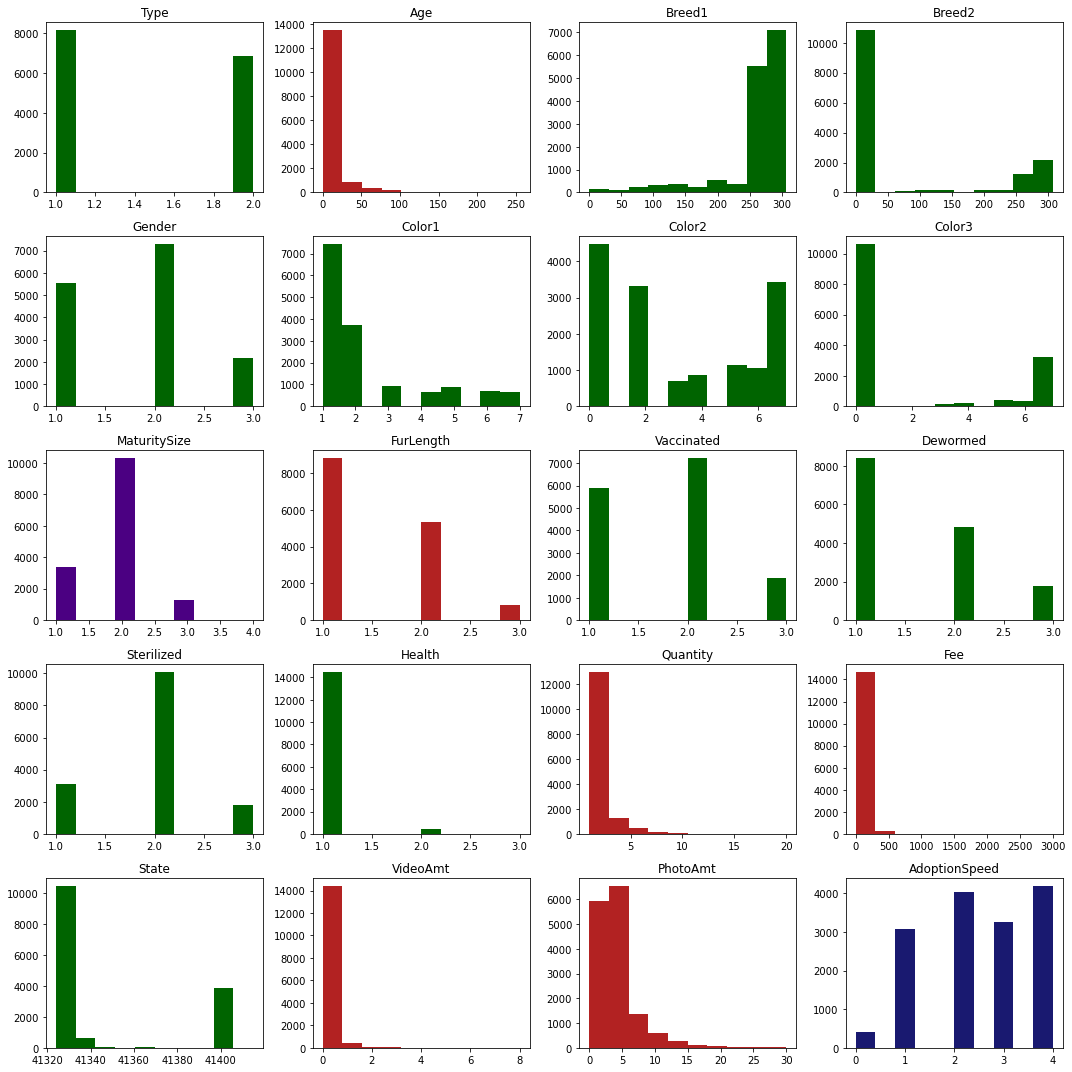

In [64]:
def plot_hist(df, r=5, c=4):
    fig, axs = plt.subplots(r, c, tight_layout=True, figsize=(15,15))
    col_q = [
        'Age', 'MaturitySize', 'FurLength', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt'
    ]
    col_p = ['Age', 'FurLength', 'VideoAmt', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
    col_txt = ['Name', 'PetID', 'RescuerID', 'Description']
    
    cols = [col for col in df.columns if col not in col_txt]
    for i in range(r):
        for j in range(c):
            col = cols[c*i+j]
            cl = 'midnightblue' if col == 'AdoptionSpeed' else 'darkgreen'
            if col in col_q:
                cl = 'firebrick' if col in col_p else 'indigo'
                cl = 'midnightblue' if col == 'AdoptionSpeed' else cl
            axs[i, j].hist(df[col], color=cl)
            axs[i, j].set_title(col)
    plt.savefig('visualizations/rawdata_hist.png')
plot_hist(df)

In [114]:
# Normalization
df = pd.read_csv('train/train.csv')
# ['Age', 'MaturitySize', 'FurLength', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt'],
col_p = ['Age', 'FurLength', 'VideoAmt', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
col_g = ['MaturitySize']
med = df.median(axis=0)
mu = df.mean(axis=0)
sig = df.std(axis=0)
print(med)
dfn = df.copy()
for col in col_p:
    dfn[col] = df[col].apply(lambda x: np.log((1 + x) / (1 + med[col]))) 
for col in col_g:
    dfn[col] = df[col].apply(lambda x: (x - mu[col]) / (sig[col]))
print(dfn.median(axis=0))

Type                 1.0
Age                  3.0
Breed1             266.0
Breed2               0.0
Gender               2.0
Color1               2.0
Color2               2.0
Color3               0.0
MaturitySize         2.0
FurLength            1.0
Vaccinated           2.0
Dewormed             1.0
Sterilized           2.0
Health               1.0
Quantity             1.0
Fee                  0.0
State            41326.0
VideoAmt             0.0
PhotoAmt             3.0
AdoptionSpeed        2.0
dtype: float64
Type                 1.00000
Age                  0.00000
Breed1             266.00000
Breed2               0.00000
Gender               2.00000
Color1               2.00000
Color2               2.00000
Color3               0.00000
MaturitySize         0.25184
FurLength            0.00000
Vaccinated           2.00000
Dewormed             1.00000
Sterilized           2.00000
Health               1.00000
Quantity             0.00000
Fee                  0.00000
State            4132

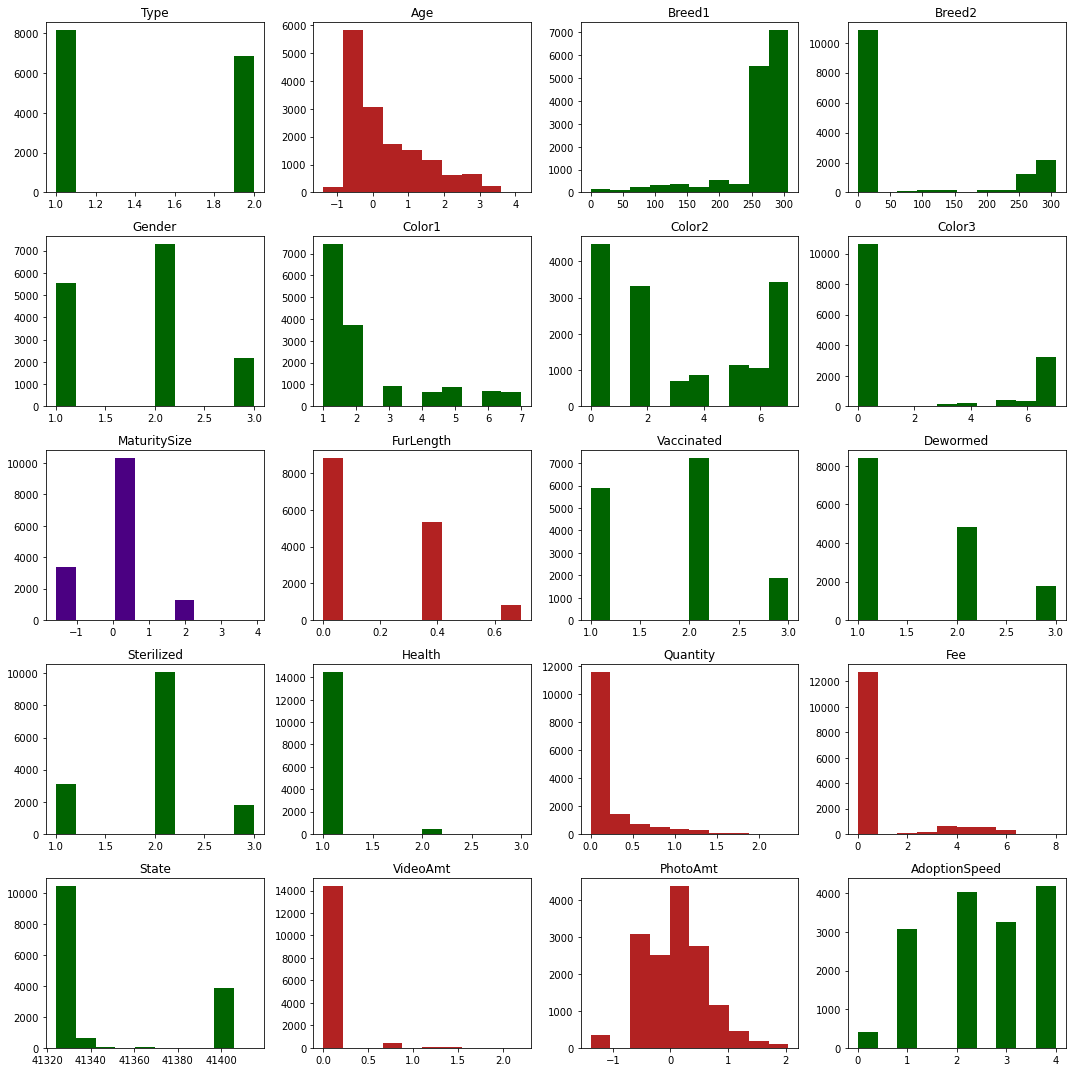

In [115]:
# normalized data
plot_hist(dfn)

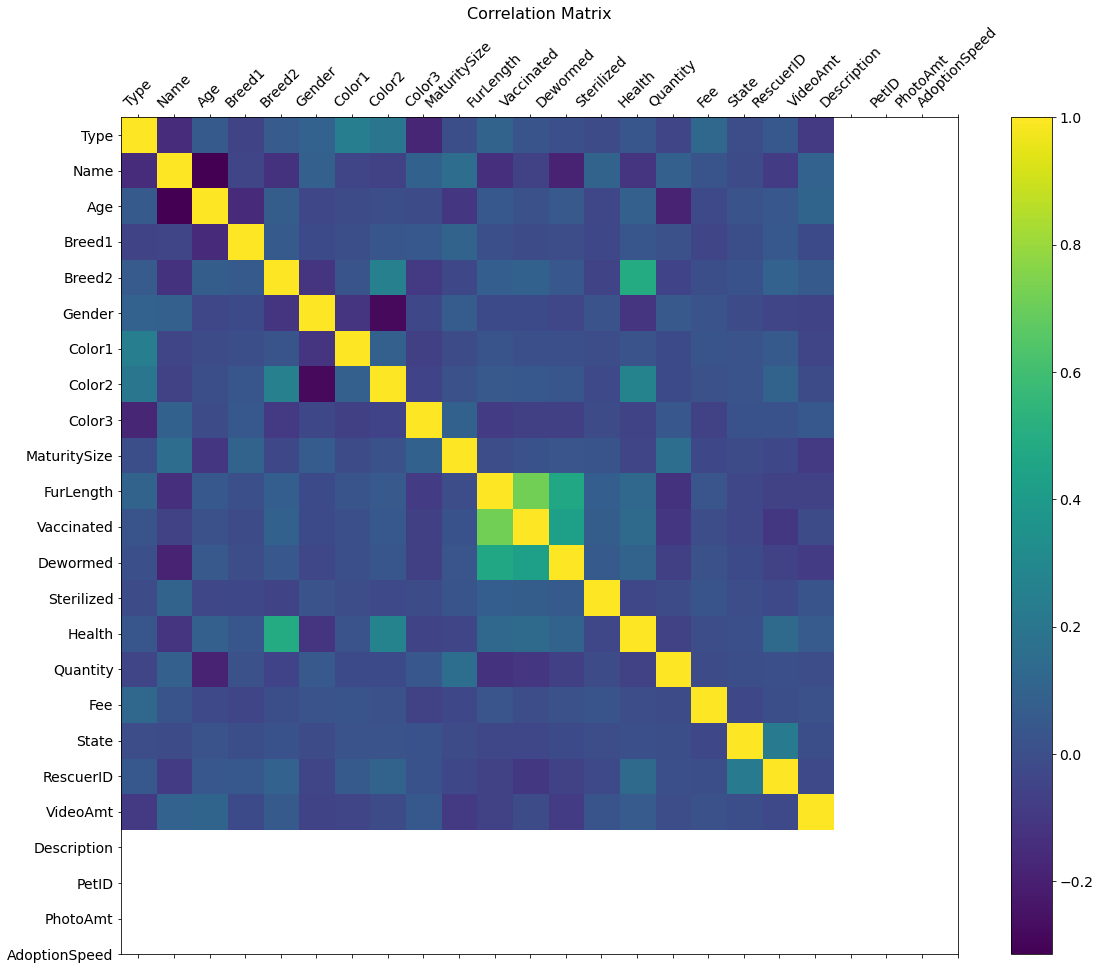

In [129]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);